# Single Input Neural Network

## Single input and two nodes in the first layer

In [1]:
import matplotlib.pyplot as plt
import dataset
import numpy as np

# Generate the dataset
SAMPLE_SIZE = 100
xs,ys = dataset.get_beans(SAMPLE_SIZE)

## Input and first layer of neural network

Note: The first layer output will be the input of the second layer

<img src="neural_network.png" alt="A simple neural network" width="300"/>

## Initialise weight and bias of each neuro on each layer
For each weight (w) to a neuro -> $w_{ijk}$, represents $i_{th}$ input data class (it could be size, colour, and shape) 

to the $j_{th}$ neuro in the $k_{th}$ neural network layer

e.g. $w_{123}$ represents the weight of 1st data class to the 2nd neuro in the 3rd neural layer

For each bias (b) of a neuro -> $b_{mn}$, represents the $m_{th}$ neuro in the $n_{th}$ layer

e.g. $b_{21}$ represents the bias of 2nd neuro in the 1st neural layer

In [2]:
# The first layer in the neural network
w_11_1 = np.random.rand()        # The weight of first input to the first neuro in the first layer of the neural network
b_1_1 = np.random.rand()         # The bias of the first neuro in the first layer

w_12_1 = np.random.rand()        # The weight of first input to the second neuro in the first layer of the neural network
b_2_1 = np.random.rand()         # The bias of the second neuro in the first layer

# The second layer in the neural network
w_11_2 = np.random.rand()
w_21_2 = np.random.rand()
b_1_2 = np.random.rand()

## Forward propagation

In [3]:
# define a sigmoid activation function
def sigmoid(z):
    return 1/(1+np.exp(-z))

# Forward propagation

def forward_propagation(x):
    # First layer
    z_11 = w_11_1*x + b_1_1
    a_11 = sigmoid(z_11)            # The output of first neuro in the first layer

    z_21 = w_12_1*x + b_2_1
    a_21 = sigmoid(z_21)            # The output of second neuro in the first layer

    # Second layer
    z_12 = w_11_2*a_11 + w_21_2*a_21 + b_1_2
    a_12 = sigmoid(z_12)            # The output of first neuro in the second layer

    return a_12, z_12, a_21, z_21, a_11, z_11

## Backward propagation
$error = (y-a_{12})^2$

<img src="neural_network.png" alt="A simple neural network" width="300"/>

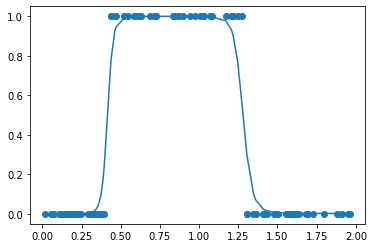

In [4]:
# Plot a dynamic plot
from IPython import display

# # Configure the plot
# plt.title("Size-Toxicity Function", fontsize=12)
# plt.xlabel('Bean Size')
# plt.ylabel('Toxicity')

alpha = 0.03   # step factor
for m in range(5000):
    for i in range(SAMPLE_SIZE):
        x = xs[i]
        y = ys[i]
        # Implement forward propagation first
        a_12, z_12, a_21, z_21, a_11, z_11 = forward_propagation(x)

        # Then do second layer backward propagation to update weights and biases
        # e = (y - a_12)**2
        # Get partial differential result for e'(a), a'(z), and z'(w)
        deda_12 = -2 * (y - a_12)
        da_12dz_12 = a_12 * (1 - a_12)
        dz_12dw_11_2 = a_11
        dz_12dw_21_2 = a_21
        dz_12db_1_2 = 1

        # Get dedw and dedb to update the cost function e(w, b)
        dedw_11_2 = deda_12 * da_12dz_12 * dz_12dw_11_2
        dedw_21_2 = deda_12 * da_12dz_12 * dz_12dw_21_2
        dedb_1_2 = deda_12 * da_12dz_12 * dz_12db_1_2


        # Then do first layer backward propagation
        dz_12da_11 = w_11_2
        da_11dz_11 = a_11 * (1 - a_11)
        dz_11dw_11_1 = x
        dz_11db_1_1 = 1
        dedw_11_1 = deda_12 * da_12dz_12 * dz_12da_11 * da_11dz_11 * dz_11dw_11_1
        dedb_1_1 = deda_12 * da_12dz_12 * dz_12da_11 * da_11dz_11 * dz_11db_1_1

        dz_12da_21 = w_21_2
        da_21dz_21 = a_21 * (1 - a_21)
        dz_21dw_12_1 = x
        dz_21db_2_1 = 1
        dedw_12_1 = deda_12 * da_12dz_12 * dz_12da_21 * da_21dz_21 * dz_21dw_12_1
        dedb_2_1 = deda_12 * da_12dz_12 * dz_12da_21 * da_21dz_21 * dz_21db_2_1


        # Then do gradient descent
        # update w and b value according to current gradient
        w_11_2 = w_11_2 - alpha * dedw_11_2
        w_21_2 = w_21_2 - alpha * dedw_21_2
        b_1_2 = b_1_2 - alpha * dedb_1_2

        w_11_1 = w_11_1 - alpha * dedw_11_1
        w_12_1 = w_12_1 - alpha * dedw_12_1
        b_1_1 = b_1_1 - alpha * dedb_1_1
        b_2_1 = b_2_1 - alpha * dedb_2_1
        

    # Plot the curve every 100 step
    if m % 100 == 0:
        # plot a dynamic fitting curve
        plt.clf()
        plt.scatter(xs,ys)

        # Then another forward propagation to update w and b, note that here should use matrix xs as variable
        a_12, z_12, a_21, z_21, a_11, z_11 = forward_propagation(xs)

        # Plot the sigmoid function value vs x value
        plt.plot(xs, a_12)                        
        display.clear_output(wait=True)
        plt.pause(0.01)